# Exercise 02

Written By: Aiden Zelakiewicz (asz39@cornell.edu)

In this exercise, you will get a comprehensive overview of data visualization using the Python package Matplotlib.
This will hopefully give you everything you need to make professional, paper-ready figures that will get your collaborators, advisors, friends, parents, pets, and local barista to react like this:

![uh](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExZWdpemkwZmY1MXk3NHhmeGduZXlrMGprcnFtdGlzZHI2YnZxMmU0aiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/V0IdVIIW1y5d6/giphy.webp)

We will start from the most basic plotting and slowly build on it more and more to make it more readable and asthetically pleasing.

When you see a "<---TO DO--->" header in this notebook, that is an exercise for you to complete! If you are struggling and have questions, ask one of the graduate students for help and we will lead you in the right direction :D

## Goals for this exercise

1. Basics of Matplotlib

2. Subplots and Gridspec

3. Plot Styles

## Basics of Matplotlib

`Matplotlib` is the most used plotting package within Python, with most plots you see in published astronomical work being created using the package. `Matplotlib` has amazing integration with other packages such as `Numpy`, `Scipy` (which we will get to), `Pandas`, and many others building around/with it.

`Matplotlib`'s primary interface that is used within Python is `pyplot`, which makes `Matplotlib` work similarly to the plotting equivalent within the coding language `MATLAB`. I will delve into this structure further, but first let us import `Matplotlib.pyplot` using the standard naming alias, `plt`.

In [1]:
# Import matplotlib
import matplotlib.pyplot as plt # plt is the conventional name for matplotlib.pyplot

# Import other packages
import numpy as np

Now, let's import the Landolt data we saved to file from the last exercise. This file contains $V$, $B-V$, $D$, and $M_V$. The first plot we will make will be a Color-Magnitude Diagram (CMD) of the Landolt stars.

In [2]:
# Skip the first row, which is the header
# Has columns of V, B-V, Distance, M_V
landolt = np.loadtxt('landolt_subset.csv', delimiter=',', skiprows=1)

# Pring the first 5 rows of the data
print(landolt[:5])

[[1.38400000e+01 5.13000000e-01 1.73070267e+03 2.64888769e+00]
 [1.06000000e+01 1.63800000e+00 7.22125939e+02 1.30693527e+00]
 [1.26800000e+01 5.28000000e-01 7.08315625e+02 3.42886589e+00]
 [1.53500000e+01 1.12800000e+00 5.01228009e+02 6.84982334e+00]
 [1.43300000e+01 6.99000000e-01 1.07388316e+03 4.17521484e+00]]


### "Quick and Dirty" Plotting

The most basic plotting function we can use is `plt.plot(x, y)`, which will create a `Matplotlib` `figure` and `axes` automatically under the hood. Later on, we will manipulate these objects individually and go into what they represent. Jupyter notebooks will automatically show plots in the output, but traditionally you need to include a `plt.show()` to print the figure.

Let us plot our CMD of $B-V$ vs $V$ for the Landolt stars in the *most* basic way.

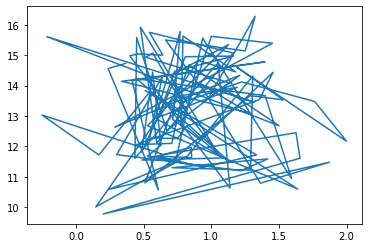

In [3]:
# Plot the data
plt.plot(landolt[:,1], landolt[:,0])

# Show the plot
plt.show()

Well that doesn't look pretty! All of the data is connected by lines instead of being discretized points. We can plot this as a scatter plot either by telling `plt.plot()` that we want markers or by using a different function. `plt.scatter()`.

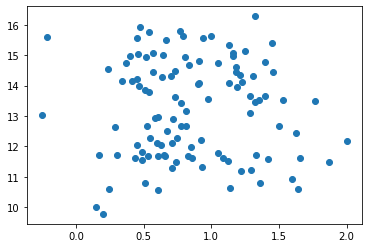

In [4]:
# The 'o' argument makes large circles
plt.plot(landolt[:,1], landolt[:,0], 'o')

plt.show()

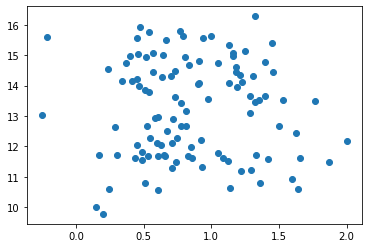

In [5]:
# Using plt.scatter
plt.scatter(landolt[:,1], landolt[:,0])

plt.show()

`Matplotlib`'s default color scheme isn't very appealing, and you may instead want your data to be black. Most functions within `Matplotlib` allow the `c=''` argument to change the color (alias for `color=''`). You can also adjust the type of marker you are using `marker=''`, which is useful for when you are displaying different types of data on the same axes. A complete list of markers can be found at https://matplotlib.org/stable/api/markers_api.html

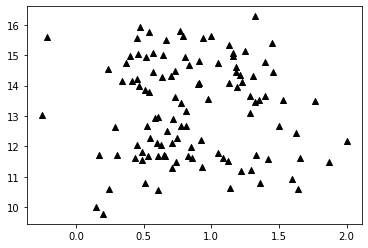

In [6]:
# Changing the color to black (k) and the marker to a triangle (^)
plt.scatter(landolt[:,1], landolt[:,0], c='k', marker='^')

plt.show()

We need units on this plot though! Others who look at your figures will not know what you are plotting unless you give them labels. We can add axis labels or even a title, although often in published worked plots don't have titles due to the existance of captions. `plt.xlabel()` and `plt.ylabel()` will do the trick! A cool feature of `Matplotlib` is your plots can includ LaTeX by using the usual LaTeX notation of `$Equation$`.

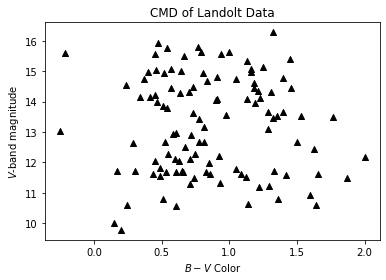

In [7]:
# Changing the color to black (k) and the marker to a triangle (^)
plt.scatter(landolt[:,1], landolt[:,0], c='k', marker='^')

# Note the dollar signs for LaTeX math mode
plt.xlabel('$B-V$ Color')
plt.ylabel('$V$-band magnitude')
plt.title('CMD of Landolt Data')
plt.show()

Often you want to plot more than one thing on a single plot. You can easily achieve this by just adding more plot calls and they don't need to be the same type of plotting function. Next we will split up the data and add a horizontal line at $V=14$ mag using `plt.axhline(y, xmin, xmax)` with a `linestyle`, or `ls` attribute to make it dashed.

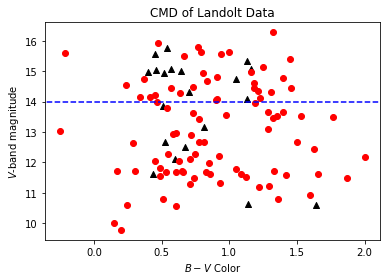

In [8]:
# Let's split up the data into two groups
plt.scatter(landolt[:20,1], landolt[:20,0], c='k', marker='^')
plt.scatter(landolt[20:,1], landolt[20:,0], c='r', marker='o') # r = red

plt.axhline(14, -1, 3, c='b', ls='--') # b = blue, -- is a dashed line

# Note the dollar signs for LaTeX math mode
plt.xlabel('$B-V$ Color')
plt.ylabel('$V$-band magnitude')
plt.title('CMD of Landolt Data')
plt.show()

#### Error Bars

We often will have errors in our data, which we can display using `plt.errorbar()` function! We just pass it our data like any other function, then include the `yerr=` or `xerr=` tag.

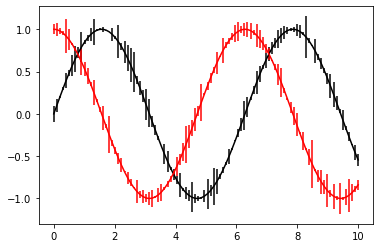

In [9]:
# Create four sets of mock data
x = np.linspace(0, 10, 100)
ys = [np.sin(x), np.cos(x), np.tan(x), np.exp(x)]

# Add gaussian noise
y_err = [np.random.normal(0, .1, size=x.size) for y in ys]

# Plot the data
plt.errorbar(x, ys[0], yerr=y_err[0], c='k')
plt.errorbar(x, ys[1], yerr=y_err[1], c='r')

plt.show()

#### Images

Sometimes you want to display 2D like a picture or maybe a density map. The function `plt.imshow()` is very useful for this purpose!

In [10]:
# Import astronomical image from astropy
# We will come back to astropy later!
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')
image_data = fits.getdata(image_file, ext=0)

print(image_data.shape)

(893, 891)


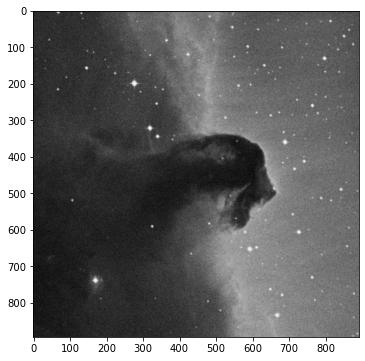

In [11]:
# Display the image
fig = plt.figure(figsize=(6,6))
plt.imshow(image_data, cmap='gray')

plt.show()

We can customize the colormap using the `cmap` option. There are many to chose from and some are even considered "standard" in some fields, such as heatmaps for interstellar medium (ISM) extinction maps! A full list is available at https://matplotlib.org/stable/users/explain/colors/colormaps.html. Often, the color of your image corresponds to some kind of data. In that case, you may want a colorbar to know the scale of each color! There are some more advanced uses of this, but the most basic way to add a colorbar is using `plt.colorbar()`.

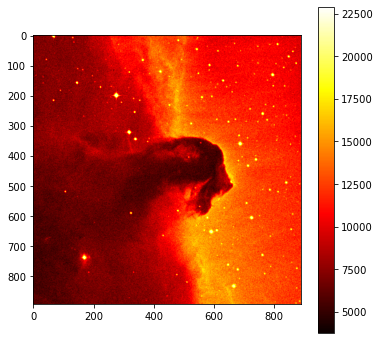

In [12]:
# Display the image
fig = plt.figure(figsize=(6,6))

plt.imshow(image_data, cmap='hot')
plt.colorbar()

plt.show()

## Subplots

Often you may want to create more than one figure. This is where we will use `Matplotlib`'s `plt.subplots()`. Matplotlib differentiates between `figures` and `axes`, in that a `figure` refers to the entire plotting area while an `axis` is a single plot. This will make more sense when we use it.

`plt.subplots(nrows, ncols)` will return a tuple that contains the `figure` object and an `ndarray` of the axes, for which there will be a total of $nrows\times ncols$. The `axes` will be in matric notation, so that there is a grid of axes that matches what it appears visually. The call necessary to modify axes attributes are slightly different than what we did before. Where before we simply did `plt.title()`, with `axes` we must do `ax.set_title()`. This also goes for things like `ax.set_xlim()` to set the limit of your data or `ax.set_ylabel()`. 

We can also add in-plot labels through a legend into our figure! In the plotting functions, we can add a call `label=''` which will add a label to that specific plotting element. Then, we can use `ax.legend()` (or `plt.legend()` without subplots) to display it! It will show the label you added along with the symbols on the figure it corresponds to.

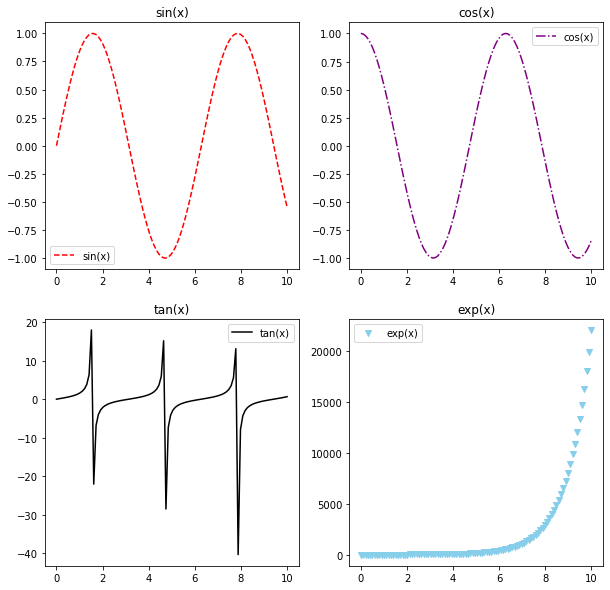

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) # figsize determines the size of the figure

# Now we can plot each set of data on a different axis with their own labels
axes[0, 0].plot(x, ys[0], c='red', ls='--', label='sin(x)') # Create a line for the sin
axes[0, 0].set_title('sin(x)')
axes[0, 0].legend()

axes[0, 1].plot(x, ys[1], c='purple', ls='-.', label='cos(x)') # Create a line for the cos
axes[0, 1].set_title('cos(x)')
axes[0, 1].legend()

axes[1, 0].plot(x, ys[2], c='k', label='tan(x)') # Create a line for the tan
axes[1, 0].set_title('tan(x)')
axes[1, 0].legend()

axes[1, 1].scatter(x, ys[3], c='skyblue', marker='v', label='exp(x)') # Create a scatter plot for the exp
axes[1, 1].set_title('exp(x)')
axes[1, 1].legend()

plt.show()

Notice how we typed out each line to plot? Because the `axes` objects are in an `ndarray`, and because of smart organization of our functions (putting them in a list), we can shorten the amount of work necessary to plot. This becomes very useful if there is a lot of repeat information you don't want to type over and over.

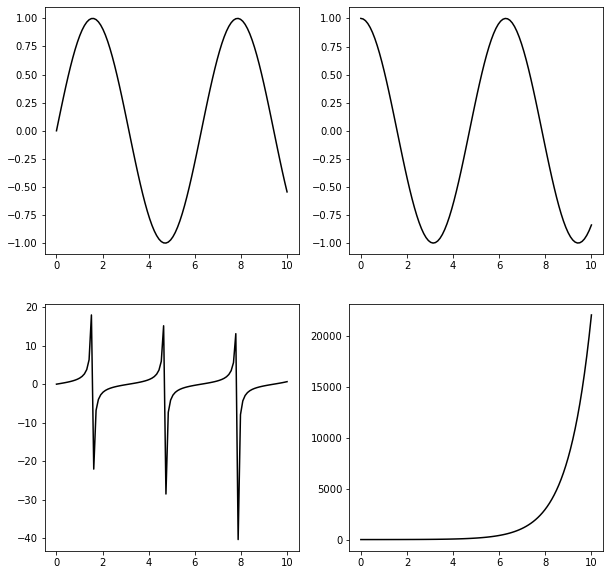

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) # figsize determines the size of the figure

# Loop over the flattened (1D) array of axes
for i in range(len(axes.flat)):
    axes.flat[i].plot(x, ys[i], c='k')

plt.show()

### <---TO DO--->

By being clever, we can still incorporate our titles into that looped plotting element. Do the same as above, but include titles into your plots from inside of the `for` loop as well as labels with legends.

In [15]:
### YOUR CODE HERE

### Gridspec

The one downside of default subplots is that all of the subplots are the same size! This can be a pain for some plotting features, like if we want to add a small residual plot below or main figure. This is where `gridspec` is amazing! It creates a grid frame for which your subplots will be placed into. Setting the `height_ratios` or `width_ratios` argument tells `gridspec` the size ratio of each axis.

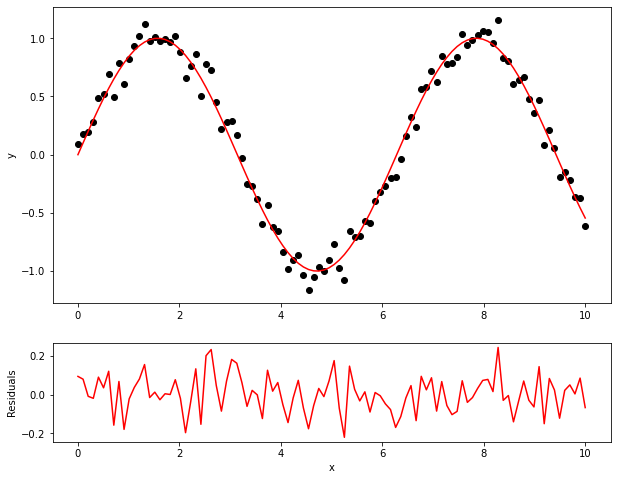

In [16]:
# import gridspec
from matplotlib.gridspec import GridSpec as gs

fig = plt.figure(figsize=(10, 8))

# Create a 2x2 grid
grid = gs(2, 1, height_ratios=[3, 1]) # 3:1 height ratio

# Create axes
ax1 = fig.add_subplot(grid[0])
ax2 = fig.add_subplot(grid[1])

noisy_data = ys[0]+y_err[0]

# Plot some noisy data
ax1.scatter(x, noisy_data, c='k')
ax1.plot(x, np.sin(x), c='r')
ax1.set_ylabel('y')

# Plot the residuals
# Yes this is just the y_err we created earlier don't come at me
ax2.plot(x, noisy_data-np.sin(x), c='r')
ax2.set_ylabel('Residuals')
ax2.set_xlabel('x')

plt.show()

## Plot Styles

Even with labels, legends, titles, and pretty colors, our plots don't look very professional. The sizes, fonts, tick marks, and other stylized parameters would need to be adjusted. This can be done either through adjusted your matplotlib parameters through `plt.rcParams.update({'font.size': 16})` or by setting them for individual elements, such as `plt.set_xlabel("", fontsize=16)`.

There are a lot of different ways to customize your plots, and I recommend exploring the official `Matplotlib` webpage if you need something specific or begging someone on Stack Exchange.

Text(0, 0.5, '$V$-band magnitude')

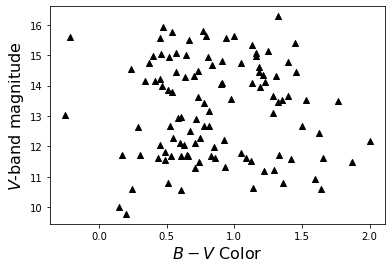

In [17]:
plt.scatter(landolt[:,1], landolt[:,0], c='k', marker='^')
plt.xlabel('$B-V$ Color', fontsize=16)
plt.ylabel('$V$-band magnitude', fontsize=16)


We can also adjust things like the tick markers and font families.

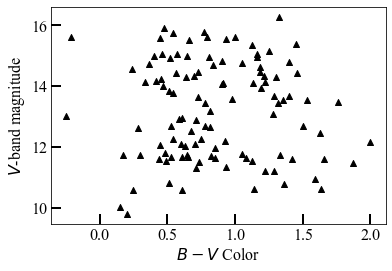

In [18]:
plt.rcParams.update({'font.size': 16, 'font.family': 'Times New Roman'})

plt.scatter(landolt[:,1], landolt[:,0], c='k', marker='^')
plt.xlabel('$B-V$ Color')
plt.ylabel('$V$-band magnitude')

# Tick parameters for all axes
plt.tick_params(axis='both', direction='in', length=10, width=2)

### Style Sheets

While have the ability to manually modify your figures appearance is super useful, it would be great if we could use a set of predefined options. This is where style sheets come in. `Matplotlib` has a lot of preinstalled style sheets you can call before plotting, or you can make one of your own!

Included in this package is the style sheet I use, titles `az-paper-twocol.mplstyle`. This style sheet was slightly modified from one created by Azalee Bostroem and was pulled from the repository [Astronomical Data](https://github.com/AllenDowney/AstronomicalData). You can call style sheets by using the `plt.style.use('style-sheet-name')` function. If you save a style sheet to your style library, you can just call it by the sheet name instead of having to define the path. Let's see how easy this is!

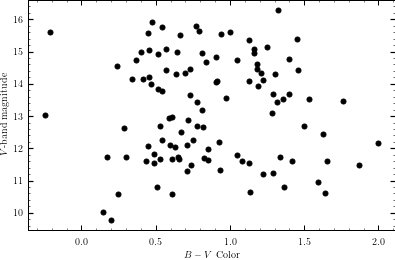

In [19]:
plt.style.use('./az-paper-twocol.mplstyle') # ./ means look in the current directory

plt.scatter(landolt[:,1], landolt[:,0])
plt.xlabel('$B-V$ Color')
plt.ylabel('$V$-band magnitude')

plt.show()

Look how much better this looks with only using a single line! You can look inside of the `az-paper-twocol` style sheet to see how many parameters were adjusted with that single line call. Setting up your own style sheet can be very rewarding and save you loads of time in the future.

### <---TO DO--->

Now, it is time to put your plotting skills to the test! In the previous exercise, we calculate the distance $D$ in parsecs and absolute visual magnitude $M_V$. Let's investigate whether there is a correlation between these two parameters by plotting them against each other! Remember the subset file we included has columns of $V$, $B-V$, $D$, $M_V$.

While creating your plots, try using one of `Matplotlib`'s default style sheets, which a list can be found [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). Make sure to include labels to tell the reader what each axis represents. You can also save your figure after you create it, using `plt.savefig('path/to/filename.png')` by putting in the name anf file extension you want it to have (can do png, jpeg, pdf, etc).

In [20]:
### YOUR CODE HERE